<a href="https://colab.research.google.com/github/JulioCastillo1/TP1-Datos/blob/master/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wordcloud as wc
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

url='https://raw.githubusercontent.com/JulioCastillo1/TP1-Datos/master/train.csv'
tweets = pd.read_csv(url)
tweets.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
def getStringFromSeries(series):
    string = ""
    for i in series:
        string = string + " " + i
    return string

In [73]:
dostweets = tweets.iloc[[1,2],:]
dostweets.head()

,id,keyword,location,text,target
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [74]:
getStringFromSeries(dostweets['text'])

" Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

In [0]:
tweetsCatastrofe = tweets.loc[tweets['target'] == 1]

In [0]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsCatastrofe['text']))

(-0.5, 399.5, 199.5, -0.5)

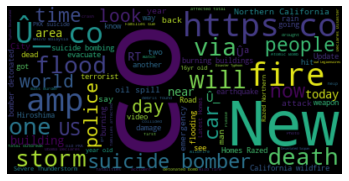

In [77]:
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")

In [0]:
tweetsNoTarget = tweets.loc[tweets['target'] == 0]

(-0.5, 399.5, 199.5, -0.5)

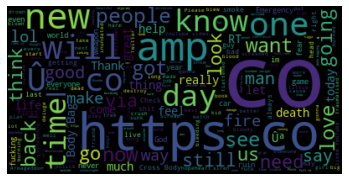

In [79]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsNoTarget['text']))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

In [80]:
#Me llama mucho la atencion que aparecen mucho las palabras co y https
#Voy a ver que onda esos tweets
tweets_https = tweets.loc[tweets['text'].str.contains('https')]
tweets_https.shape

(407, 5)

In [81]:
tweets_https.head()

,id,keyword,location,text,target
57,81,ablaze,"Sao Paulo, Brazil",Set our hearts ablaze and every city was a gif...,0
62,89,ablaze,Twitter Lockout in progress,Rene Ablaze &amp; Jacinta - Secret 2k13 (Falle...,0
68,97,accident,"Nashville, TN",Accident on I-24 W #NashvilleTraffic. Traffic ...,1
71,102,accident,"St. Louis, MO",#stlouis #caraccidentlawyer Speeding Among Top...,0
76,110,accident,Norf Carolina,'By accident' they knew what was gon happen ht...,0


In [82]:
tweets_https['target'].sum()

134

In [83]:
sample = tweets_https.sample()
sample['text'].iloc[0]

'A new favorite: Midfield General  Disco Sirens House Edm Version Soni Soner by @sonisoner https://t.co/DEvffPTCVj on #SoundCloud'

In [84]:
sample['target']

6182    0
Name: target, dtype: int64

In [85]:
tweets_https.loc[5496]

id                                                       7843
keyword                                            quarantine
location                                                  NaN
text        Reddit Will Now Quarantine OffensiveåÊContent ...
target                                                      0
Name: 5496, dtype: object

In [86]:
#Despues de samplear un poco, decidi sacar los tweets que tienen https, porque me ensuciaban el wordcloud
tweets = tweets.loc[~(tweets['text'].str.contains('https'))]
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
tweetsCatastrofe = tweets.loc[tweets['target'] == 1]
tweetsNoTarget = tweets.loc[tweets['target'] == 0]

(-0.5, 399.5, 199.5, -0.5)

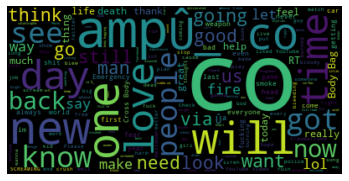

In [88]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsNoTarget['text']))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

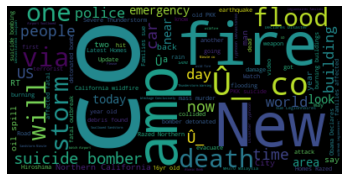

In [89]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsCatastrofe['text']))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

In [90]:
#Ahora aprece mucho CO, vamos a ver eso que onda
tweets_co = tweets.loc[tweets['text'].str.contains('co')]
tweets_co.shape

(4273, 5)

(-0.5, 399.5, 199.5, -0.5)

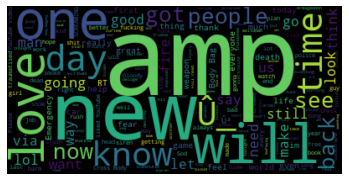

In [91]:
#Puf son una banda, no puedo solo sacarlos. Lo que voy a hacer es eliminar co del string de donde armo el wordcloud
#Pues me parece que solo ensucia al wordcloud
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsNoTarget['text']).replace("co",""))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

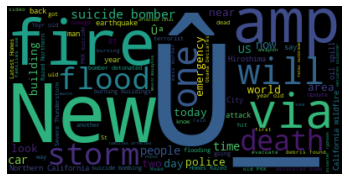

In [92]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsCatastrofe['text']).replace("co",""))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

In [93]:
#Me intriga "amp" todavia
tweets_amp = tweets.loc[tweets['text'].str.contains('amp')]
tweets_amp.shape

(395, 5)

In [94]:
tweets_amp.sample()['text'].iloc[0]

'I-77 Mile Marker 31 South Mooresville  Iredell Vehicle Accident Ramp Closed at 8/6 1:18 PM'

(-0.5, 399.5, 199.5, -0.5)

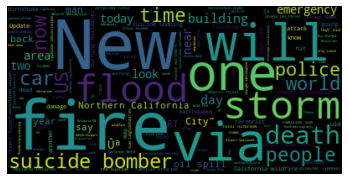

In [95]:
#Ok amp tiene que ver con el caracter &, tambien lo voy a sacar del wordcloud
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsCatastrofe['text']).replace("co","").replace("amp","").replace("Û_",""))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

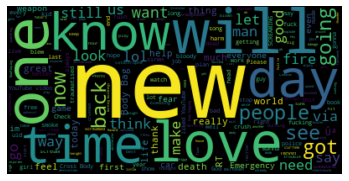

In [96]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(tweetsNoTarget['text']).replace("co","").replace("amp","").replace("Û_",""))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

Puede observarse que muchos de los términos que se muestran como los más frecuentes son irrelevantes, al tratarse stop words, protocolos y dominios de internet, etc. Se procede a realizar una limpieza de dichas palabras.



In [0]:
strings = getStringFromSeries(tweets['text'])

In [0]:
wordcloud = wc.WordCloud().generate(strings)

In [0]:
stopwordsList = stopwords.words('english')

In [0]:
cleaned = ' '.join([word for word in strings.split() if word not in stopwordsList])
cleaned = cleaned.replace("https"," ")
cleaned = cleaned.replace("co"," ")

In [0]:
wordcloud = wc.WordCloud().generate(cleaned)

(-0.5, 399.5, 199.5, -0.5)

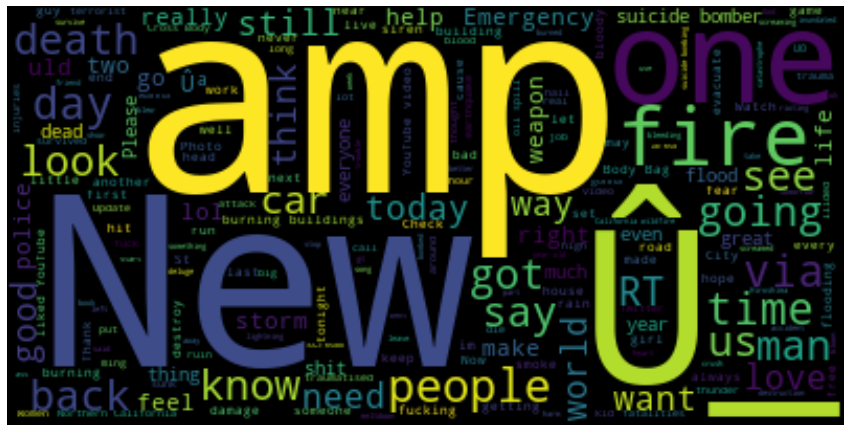

In [102]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")

A continuación se procede a analizar las keywords mas prevalentes.

In [0]:
keywords=tweets[['keyword']].dropna().astype('str')

In [104]:
getStringFromSeries(keywords['keyword'])

' ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze ablaze accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident accident aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock aftershock airplane%20accident airplane%20accident airplane%20accident airplane%20accident airplane%20accident airplane%20accident airplane%20accident airplane%

In [0]:
wordcloud = wc.WordCloud().generate(getStringFromSeries(keywords['keyword']))

(-0.5, 399.5, 199.5, -0.5)

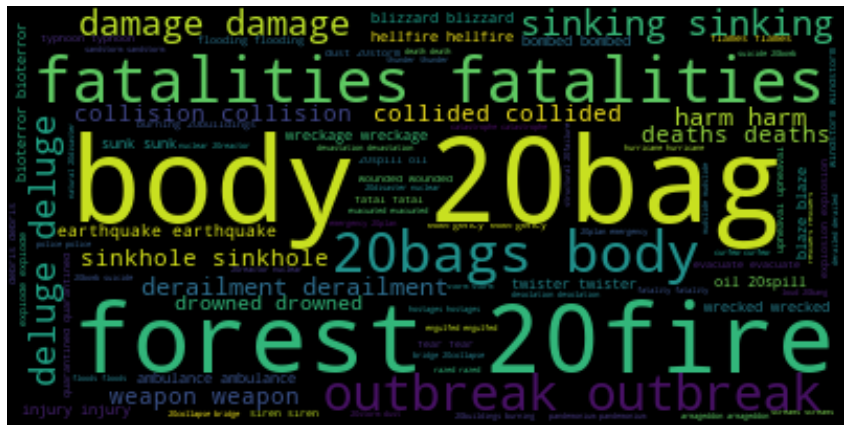

In [106]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = "bilinear")
plt.axis("off")

De esta manera pueden visualizarse los términos que son mas frecuentes, y que a la vez son relevantes.